Extracting ../Data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../Data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../Data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../Data/MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 81.569051341
Epoch: 0002 cost= 23.151930962
Epoch: 0003 cost= 13.070388444
Epoch: 0004 cost= 8.756619399
Epoch: 0005 cost= 5.865435691
Epoch: 0006 cost= 4.020653801
Epoch: 0007 cost= 2.786365948
Epoch: 0008 cost= 1.856384369
Epoch: 0009 cost= 1.298306200
Epoch: 0010 cost= 0.979276151
Epoch: 0011 cost= 0.719477445
Epoch: 0012 cost= 0.489065363
Epoch: 0013 cost= 0.380099421
Epoch: 0014 cost= 0.265073554
Epoch: 0015 cost= 0.152370640
Epoch: 0016 cost= 0.157724796
Epoch: 0017 cost= 0.116162076
Epoch: 0018 cost= 0.092296885
Epoch: 0019 cost= 0.057349690
Epoch: 0020 cost= 0.043453598
Optimization Finished!


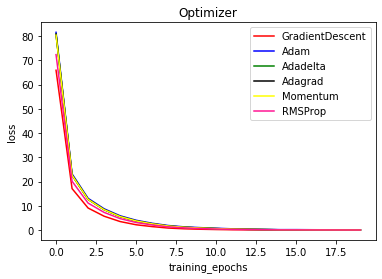

In [2]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../Data/MNIST_data/", one_hot=True)

# training Parameters
learning_rate = 0.0001
training_epochs = 20
batch_size = 16
display_step = 1
learning_momentum = 0.9

# Network Parameters
n_hidden_1 = 256  # 1st layer number of features
n_hidden_2 = 512  # 2nd layer number of features
n_input = 784     # MNIST data input (img shape: 28*28)
n_classes = 10    # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Store layers weight & biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Create model
def multilayer_perceptron(x, weights, biases):

    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer




# fig = plt.figure(1, figsize=(12, 8))
# fig.suptitle(' method: Momentum Optimizer, learning_rate=%.4f'%(learning_rate), fontsize=15)
plt.title('Optimizer')
plt.xlabel('training_epochs')
plt.ylabel('loss')
# plt.ion() # iteration on

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

# optimizer setting
optimizer_Adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer_Adadelta = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer_Adagrad = tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer_Momentum = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=learning_momentum).minimize(cost)
optimizer_RMSProp = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer_GradientDescent = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

all_step = []
all_loss_Adam = []
all_loss_Adadelta = []
all_loss_Adagrad = []
all_loss_Momentum = []
all_loss_RMSProp = []
all_loss_GradientDescent = []


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost_Adam = 0.
        avg_cost_Adadelta = 0.
        avg_cost_Adagrad = 0.
        avg_cost_Momentum = 0.
        avg_cost_RMSProp = 0.
        avg_cost_GradientDescent = 0.

        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c_Adam = sess.run([optimizer_Adam, cost], feed_dict={x: batch_x, y: batch_y})
            _, c_Adadelta = sess.run([optimizer_Adadelta, cost], feed_dict={x: batch_x, y: batch_y})
            _, c_Adagrad = sess.run([optimizer_Adagrad, cost], feed_dict={x: batch_x, y: batch_y})
            _, c_Momentum = sess.run([optimizer_Momentum, cost], feed_dict={x: batch_x, y: batch_y})
            _, c_RMSProp = sess.run([optimizer_RMSProp, cost], feed_dict={x: batch_x, y: batch_y})
            _, c_GradientDescent = sess.run([optimizer_GradientDescent, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost_Adam += c_Adam
            avg_cost_Adadelta += c_Adadelta
            avg_cost_Adagrad += c_Adagrad
            avg_cost_Momentum += c_Momentum
            avg_cost_RMSProp += c_RMSProp
            avg_cost_GradientDescent += c_GradientDescent

        # Compute average loss
        avg_cost_Adam = avg_cost_Adam / total_batch
        avg_cost_Adadelta = avg_cost_Adadelta / total_batch
        avg_cost_Adagrad = avg_cost_Adagrad / total_batch
        avg_cost_Momentum = avg_cost_Momentum / total_batch
        avg_cost_RMSProp = avg_cost_RMSProp / total_batch
        avg_cost_GradientDescent = avg_cost_GradientDescent / total_batch

        # opt loss
        all_step.append(epoch)
        all_loss_Adam.append(avg_cost_Adam)
        all_loss_Adadelta.append(avg_cost_Adadelta)
        all_loss_Adagrad.append(avg_cost_Adagrad)
        all_loss_Momentum.append(avg_cost_Momentum)
        all_loss_RMSProp.append(avg_cost_RMSProp)
        all_loss_GradientDescent.append(avg_cost_GradientDescent)

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost_Adam))

    print("Optimization Finished!")

plt.plot(all_step, all_loss_GradientDescent, color='red', label='GradientDescent')
plt.plot(all_step, all_loss_Adam, color='blue', label='Adam')
plt.plot(all_step, all_loss_Adadelta, color='green', label='Adadelta')
plt.plot(all_step, all_loss_Adagrad, color='black', label='Adagrad')
plt.plot(all_step, all_loss_Momentum, color='yellow', label='Momentum')
plt.plot(all_step, all_loss_RMSProp, color='deeppink', label='RMSProp')
plt.legend(loc='best')

plt.show()